In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from datetime import date
import datetime
from sklearn import metrics
import sklearn as sk
import six
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
comparison_columns = ['grade','age','gender','ndays_act', 'nevents', 'nplay_video','nchapters','nforum_posts',
                      'total_activity','viewed','explored']

In [4]:
data[comparison_columns].corr()

,grade,age,ndays_act,nevents,nplay_video,nchapters,nforum_posts,total_activity,viewed,explored
grade,1.000000,-0.006883,0.734289,0.708108,0.426550,0.699863,0.112328,0.336474,0.167548,0.692455
age,-0.006883,1.000000,0.014908,0.004322,0.007989,0.008195,-0.029792,0.006408,-0.019622,0.006762
ndays_act,0.734289,0.014908,1.000000,0.824735,0.555979,0.702574,0.144736,0.432399,0.238277,0.649746
nevents,0.708108,0.004322,0.824735,1.000000,0.735798,0.614646,0.131715,0.322178,0.183768,0.588577
nplay_video,0.426550,0.007989,0.555979,0.735798,1.000000,0.361502,0.080026,0.220107,0.124515,0.367265
nchapters,0.699863,0.008195,0.702574,0.614646,0.361502,1.000000,0.144426,0.438714,0.423771,0.789961
nforum_posts,0.112328,-0.029792,0.144736,0.131715,0.080026,0.144426,1.000000,0.072211,0.064617,0.097020
total_activity,0.336474,0.006408,0.432399,0.322178,0.220107,0.438714,0.072211,1.000000,0.243235,0.391964
viewed,0.167548,-0.019622,0.238277,0.183768,0.124515,0.423771,0.064617,0.243235,1.000000,0.199247
explored,0.692455,0.006762,0.649746,0.588577,0.367265,0.789961,0.097020,0.391964,0.199247,1.000000


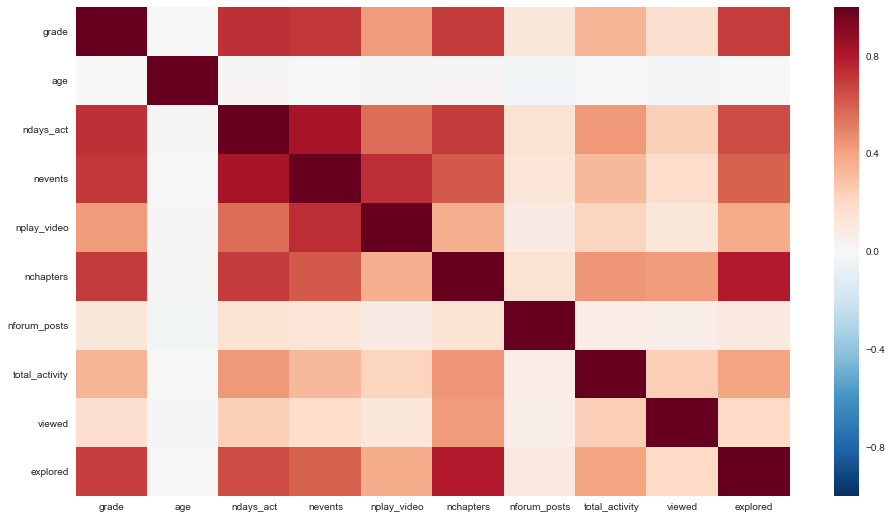

In [5]:
sns.heatmap(data[comparison_columns].corr())

# **Correlation between variables**
(high correlations from correlation table were considered in this testing)

,Slope,Intercept,Correlation coeficient,Std_err
0,4.443109,143.056379,0.735798,0.005813


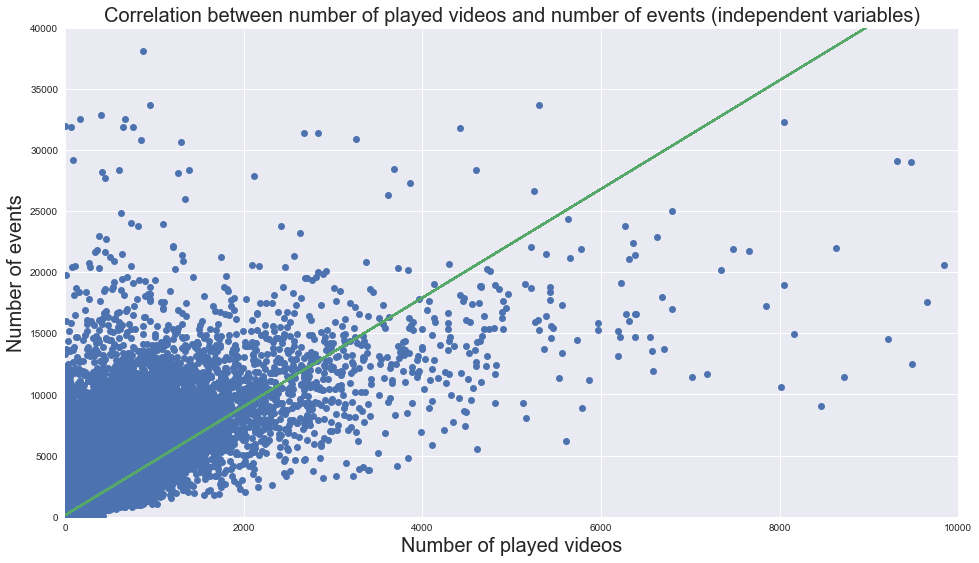

In [6]:
plt.xlabel('Number of played videos', fontname = "Arial", fontsize=20)
plt.ylabel('Number of events', fontname = "Arial", fontsize=20)
plt.title('Correlation between number of played videos and number of events (independent variables)', fontname = "Arial", fontsize=20)
slope, intercept, r_value, p_value, std_err = stats.linregress(data['nplay_video'],data['nevents'])
line = slope* data['nplay_video']+intercept
axes = plt.gca()
axes.set_xlim([0,10000])
axes.set_ylim([0,40000])

plt.plot(data['nplay_video'],data['nevents'],'o', data['nplay_video'], line)
res = pd.DataFrame([[slope, intercept, r_value, std_err]], columns=['Slope', 'Intercept', 'Correlation coeficient', 'Std_err'])
res.head()

,slope,intercept,r_value,p_value,std_err
0,98.723039,-114.435066,0.824735,0.0,0.096237


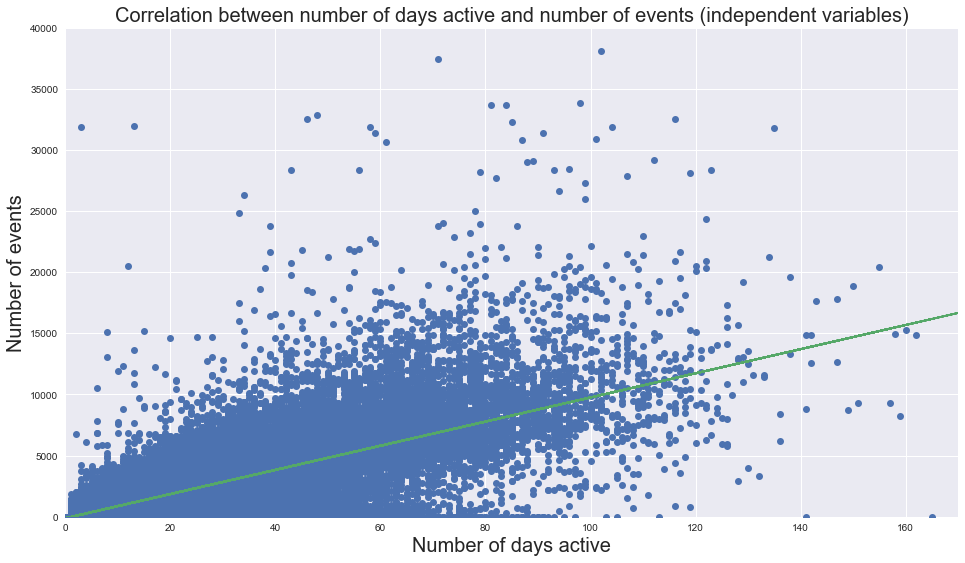

In [7]:
plt.xlabel('Number of days active',  fontname = "Arial", fontsize=20)
plt.ylabel('Number of events',  fontname = "Arial", fontsize=20)
plt.title('Correlation between number of days active and number of events (independent variables)', fontname = "Arial", fontsize=20)
slope, intercept, r_value, p_value, std_err = stats.linregress(data['ndays_act'],data['nevents'])
line = slope* data['ndays_act']+intercept
axes = plt.gca()
axes.set_xlim([0,170])
axes.set_ylim([0,40000])

plt.plot(data['ndays_act'],data['nevents'],'o', data['ndays_act'], line)
res = pd.DataFrame([[slope, intercept, r_value, p_value, std_err]], columns=['slope', 'intercept', 'r_value', 'p_value', 'std_err'])
res.head()

,slope,intercept,r_value,p_value,std_err
0,1.814629,0.180953,0.702574,0.0,0.002613


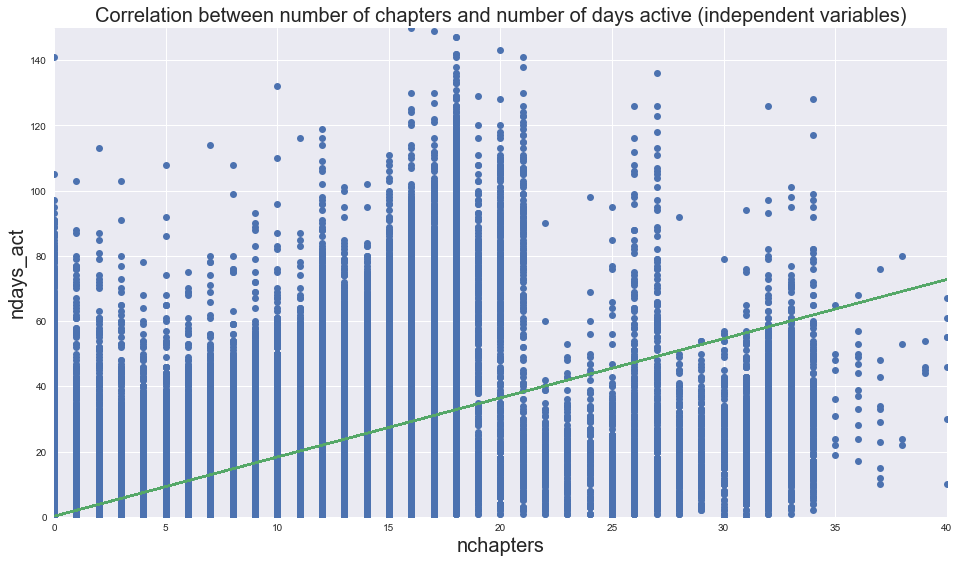

In [8]:
plt.xlabel('Number of chapters', fontname = "Arial", fontsize=20)
plt.ylabel('Number of days active', fontname = "Arial", fontsize=20)
plt.title('Correlation between number of chapters and number of days active (independent variables)', fontname = "Arial", fontsize=20)
slope, intercept, r_value, p_value, std_err = stats.linregress(data['nchapters'],data['ndays_act'])
line = slope* data['nchapters']+intercept
axes = plt.gca()
axes.set_xlim([0,40])
axes.set_ylim([0, 150])

plt.plot(data['nchapters'],data['ndays_act'],'o', data['nchapters'], line)
res = pd.DataFrame([[slope, intercept, r_value, p_value, std_err]], columns=['slope', 'intercept', 'r_value', 'p_value', 'std_err'])
res.head()

# Correlations with grade

,slope,intercept,r_value,p_value,std_err
0,0.010767,-0.011899,0.734289,0.0,0.000014


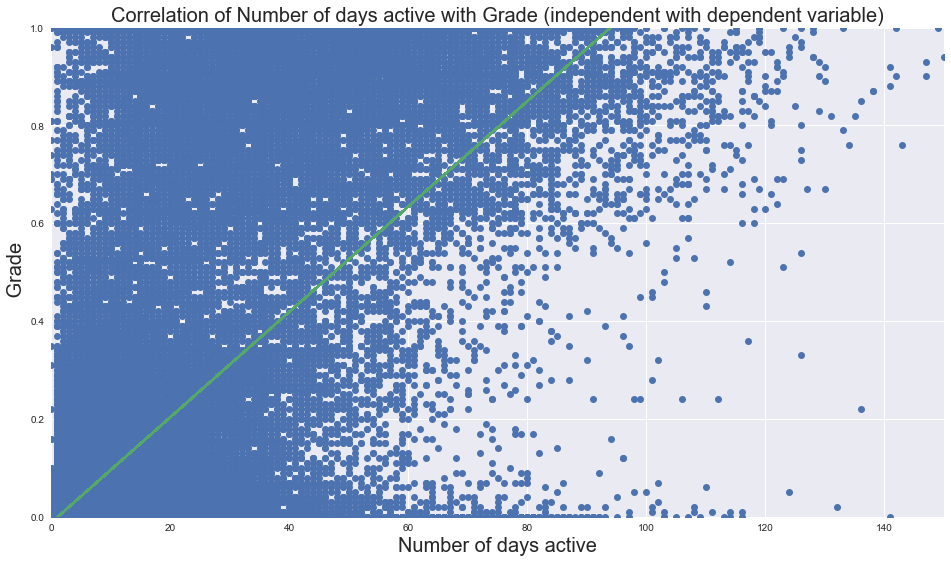

In [10]:
plt.xlabel('Number of days active',  fontname = "Arial", fontsize=20)
plt.ylabel(' Grade',  fontname = "Arial", fontsize=20)
plt.title("Correlation of Number of days active with Grade (independent with dependent variable)",  fontname = "Arial", fontsize=20)
slope, intercept, r_value, p_value, std_err = stats.linregress(data['ndays_act'],data['grade'])
#p_r_value, p_p_value = stats.pearsonr(data['ndays_act'],data['grade'])
line = slope* data['ndays_act']+intercept
axes = plt.gca()
axes.set_ylim([0,1])
axes.set_xlim([0,150])

plt.plot(data['ndays_act'],data['grade'],'o', data['ndays_act'], line)
res = pd.DataFrame([[slope, intercept, r_value, p_value, std_err]], columns=['slope', 'intercept', 'r_value', 'p_value', 'std_err'])
res.head()

,slope,intercept,r_value,p_value,std_err
0,0.000087,0.006918,0.708108,0.0,1.229710e-07


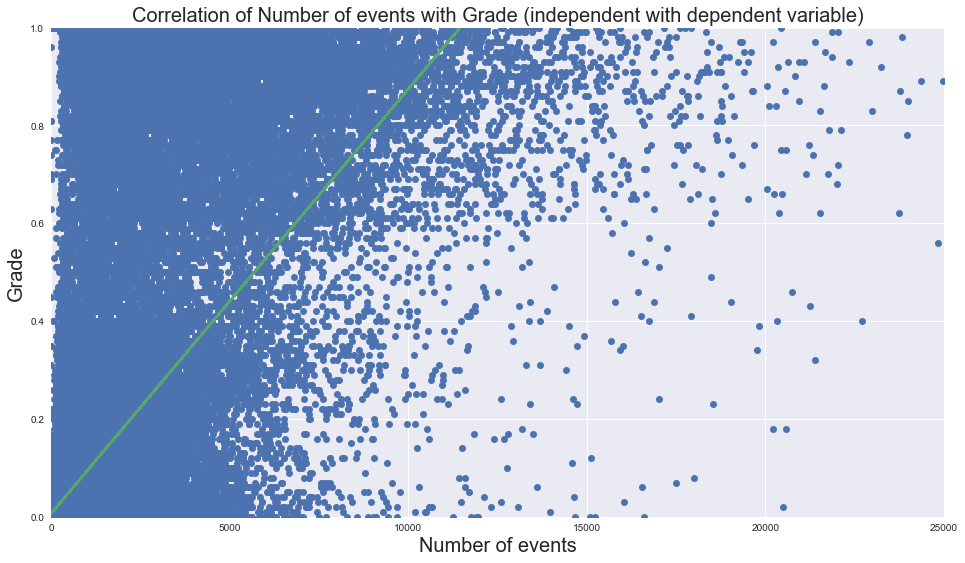

In [12]:
plt.xlabel('Number of events', fontname = "Arial", fontsize=20)
plt.ylabel('Grade', fontname = "Arial", fontsize=20)
plt.title("Correlation of Number of events with Grade (independent with dependent variable)",  fontname = "Arial", fontsize=20)
slope, intercept, r_value, p_value, std_err = stats.linregress(data['nevents'],data['grade'])
line = slope* data['nevents']+intercept
axes = plt.gca()
axes.set_xlim([0,25000])
axes.set_ylim([0,1])

plt.plot(data['nevents'],data['grade'],'o', data['nevents'], line)
res = pd.DataFrame([[slope, intercept, r_value, p_value, std_err]], columns=['slope', 'intercept', 'r_value', 'p_value', 'std_err'])
res.head()

,slope,intercept,r_value,p_value,std_err
0,-0.000113,0.035258,-0.006883,0.000001,0.000023


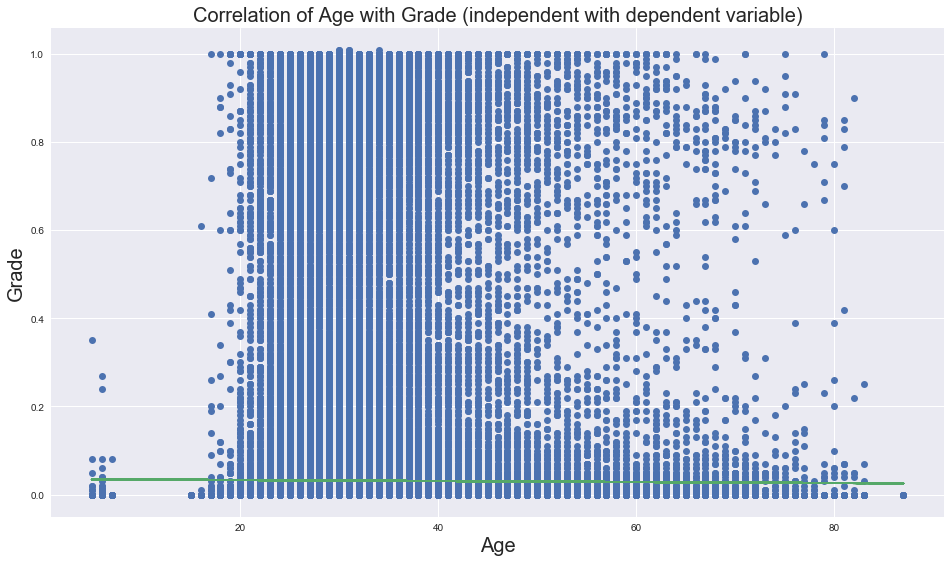

In [13]:
plt.xlabel('Age', fontname = "Arial", fontsize=20)
plt.ylabel('Grade', fontname = "Arial", fontsize=20)
plt.title("Correlation of Age with Grade (independent with dependent variable)",  fontname = "Arial", fontsize=20)
slope, intercept, r_value, p_value, std_err = stats.linregress(data['age'],data['grade'])
line = slope* data['age']+intercept

plt.plot(data['age'],data['grade'],'o')
plt.plot(data['age'], line)
res = pd.DataFrame([[slope, intercept, r_value, p_value, std_err]], columns=['slope', 'intercept', 'r_value', 'p_value', 'std_err'])
res.head()